In [ ]:
# 머신러닝
# regression analysis
# Linear Models
# Linear Regression, Ridge Regression, Lasso Regression ElasticNet, Orthogonal Matchin Pursuit, Polynomial Regression

In [4]:
from sklearn.datasets import fetch_california_housing

# california_housing 데이터 확인

california = fetch_california_housing()
print(california.keys())
print(california.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($10

In [16]:
import pandas as pd

california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['Target'] = california.target
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [18]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


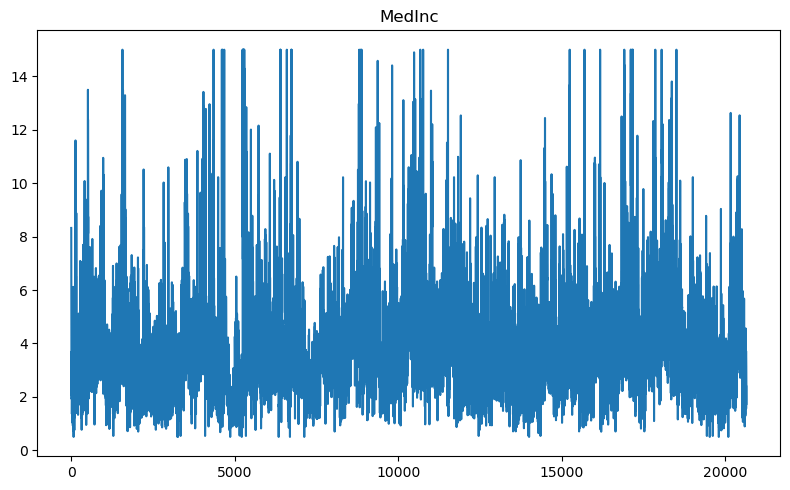

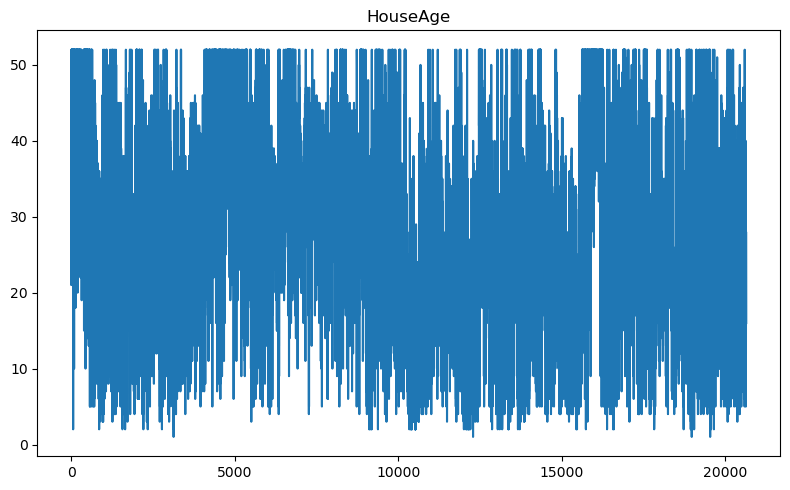

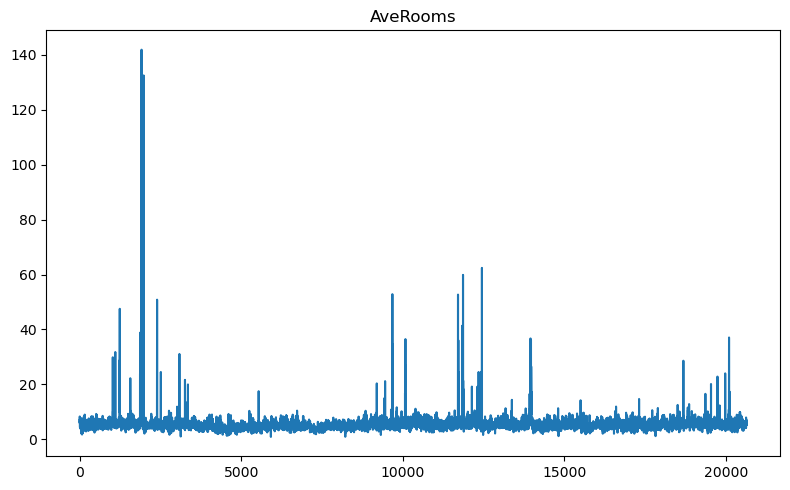

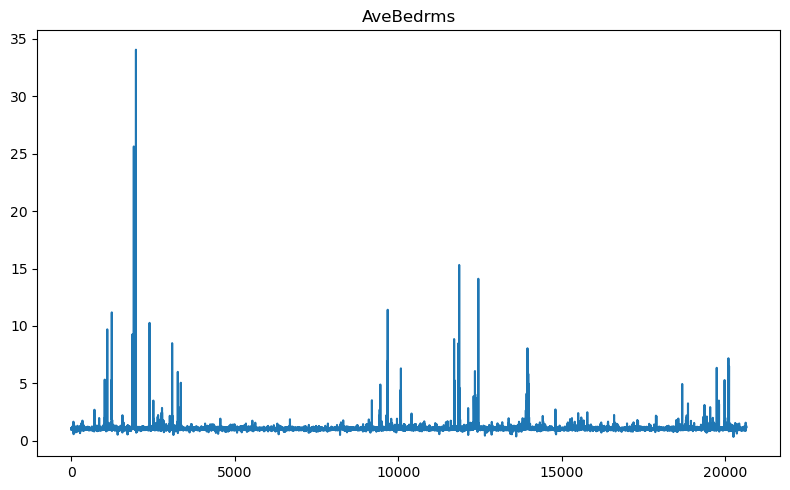

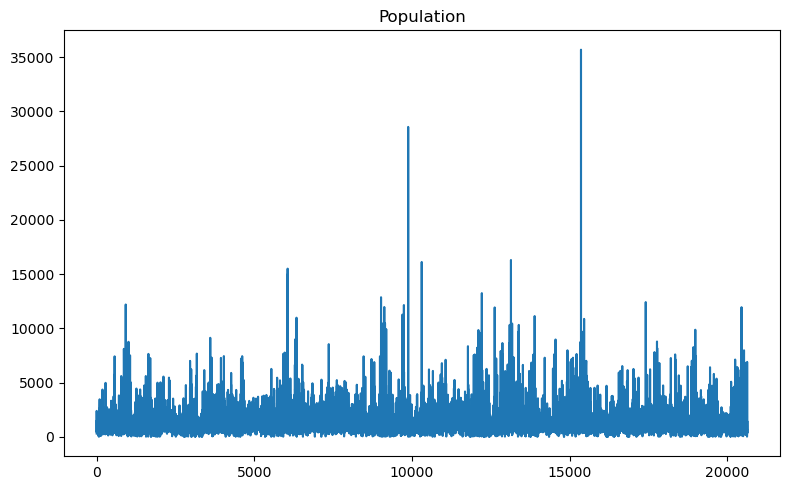

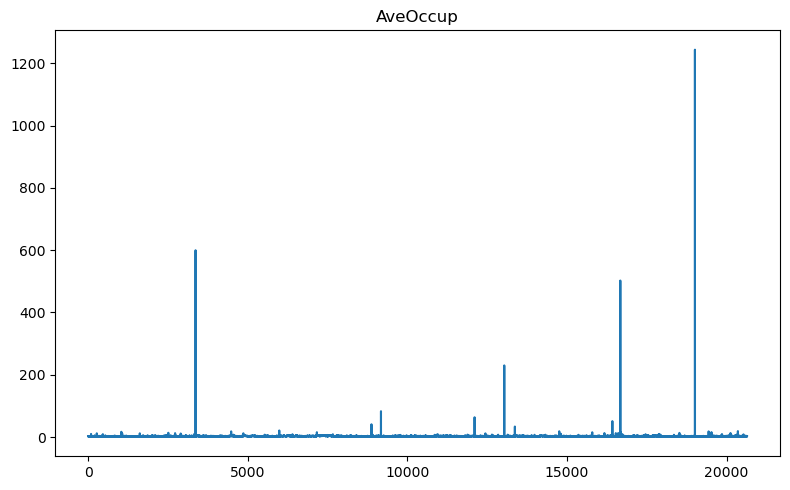

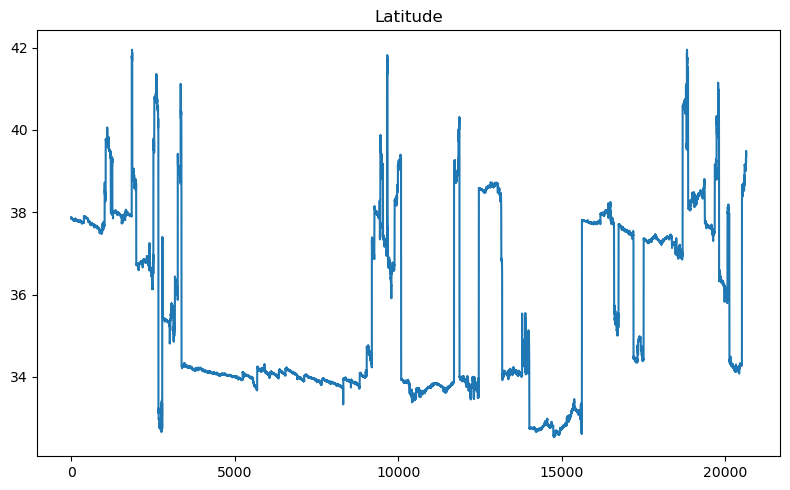

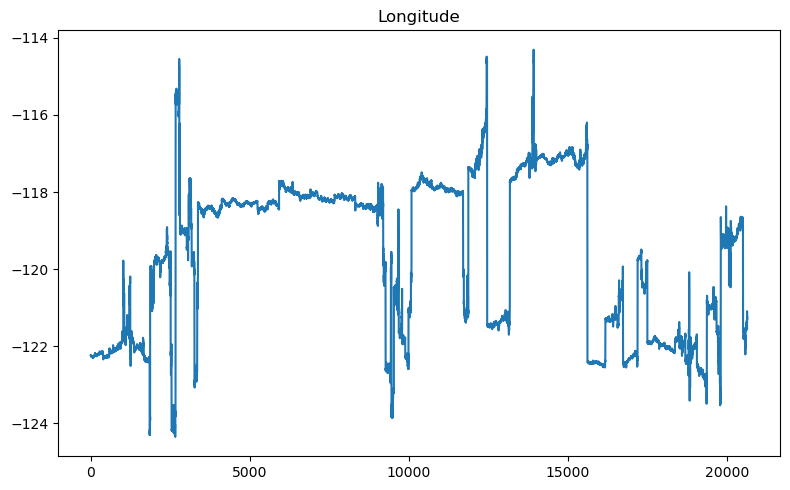

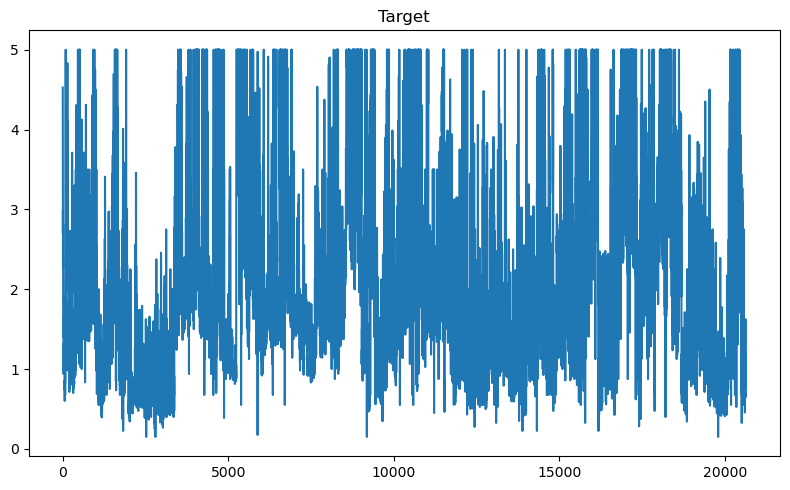

In [20]:
import matplotlib.pyplot as plt

for i, col in enumerate(california_df.columns):
    plt.figure(figsize=(8,5))
    plt.plot(california_df[col])
    plt.title(col)
    plt.tight_layout()

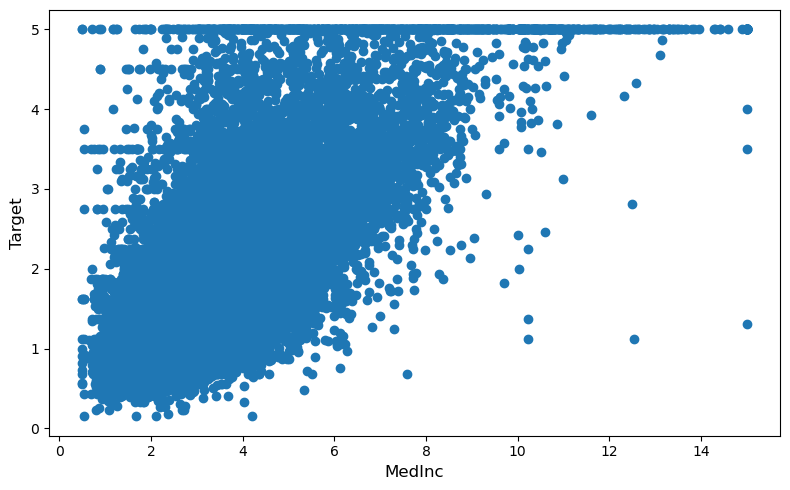

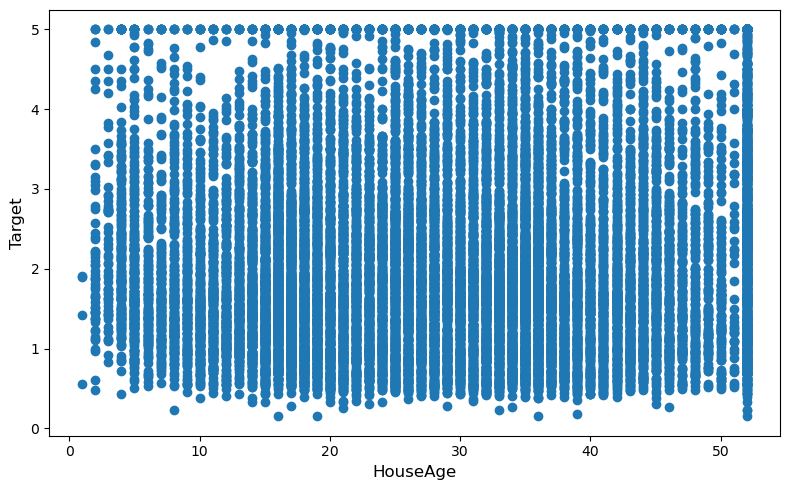

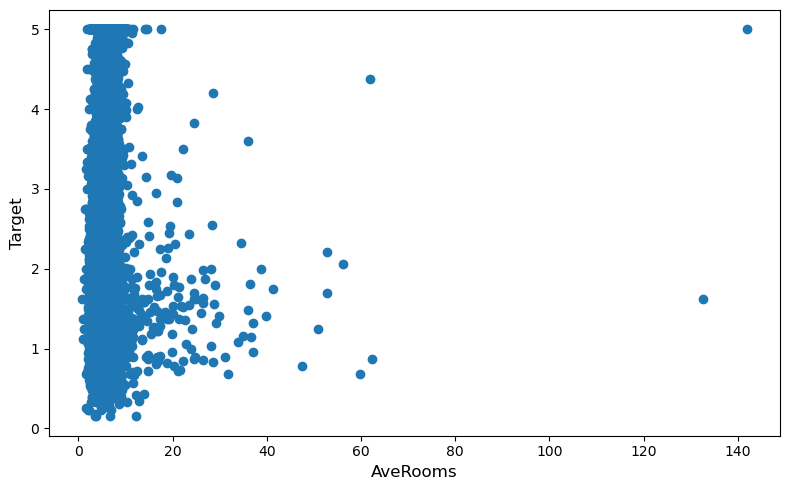

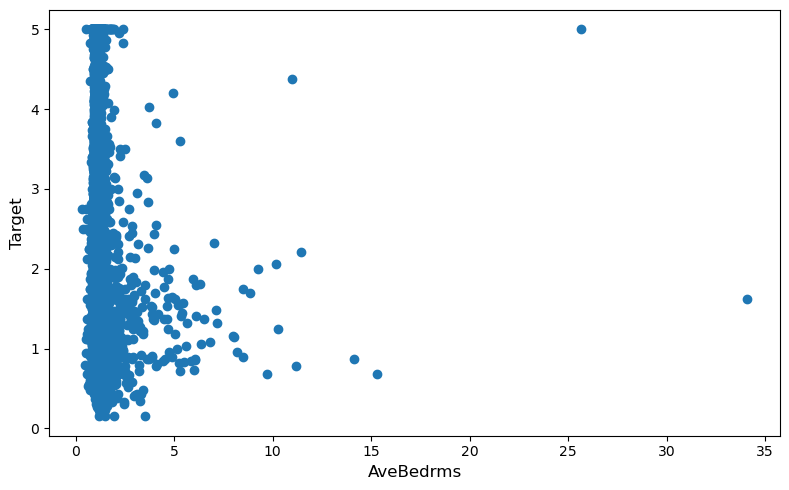

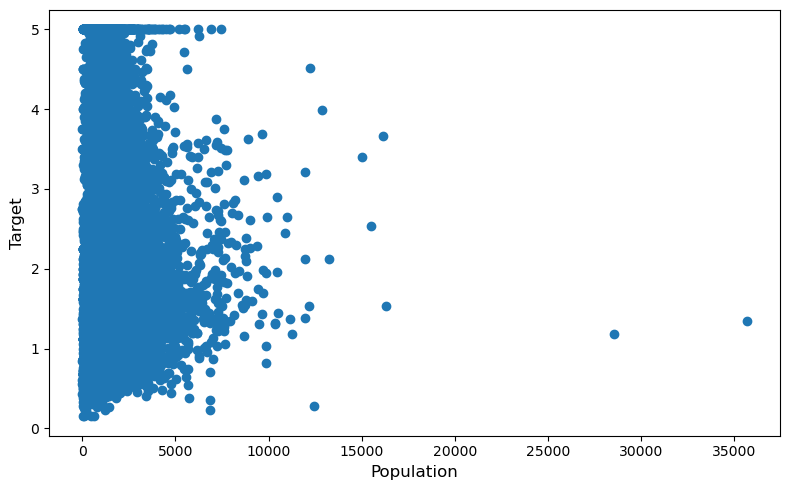

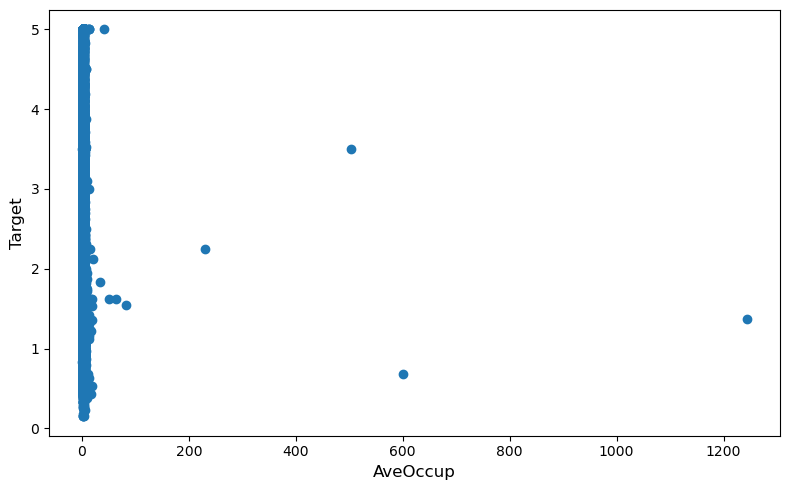

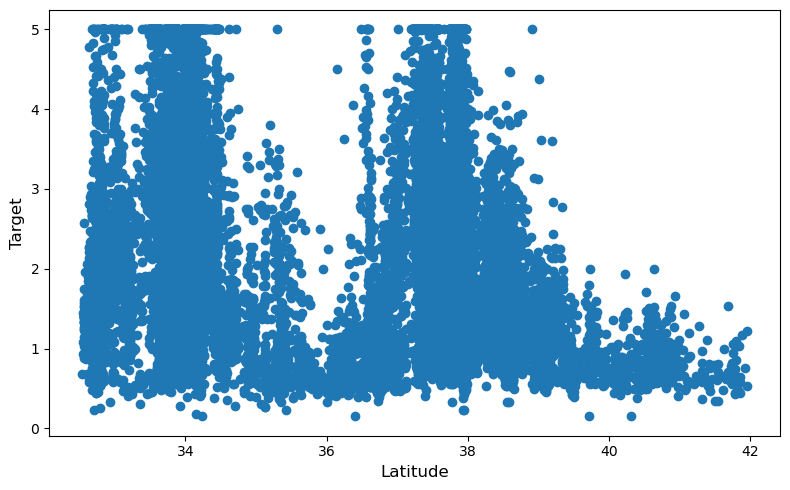

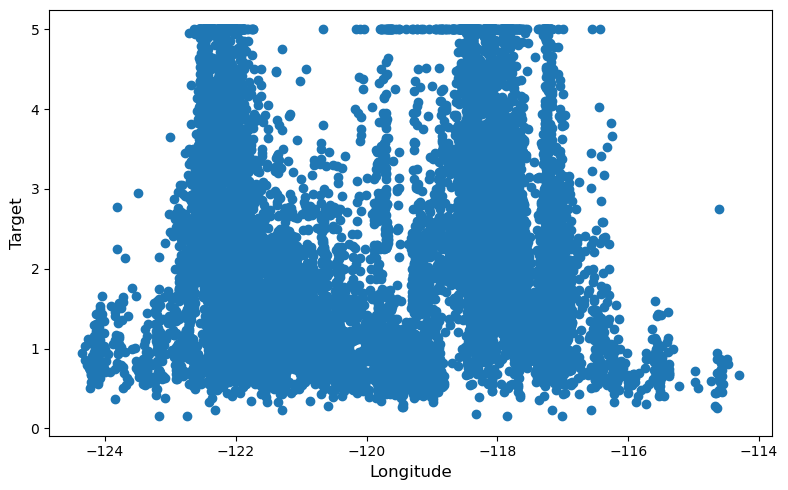

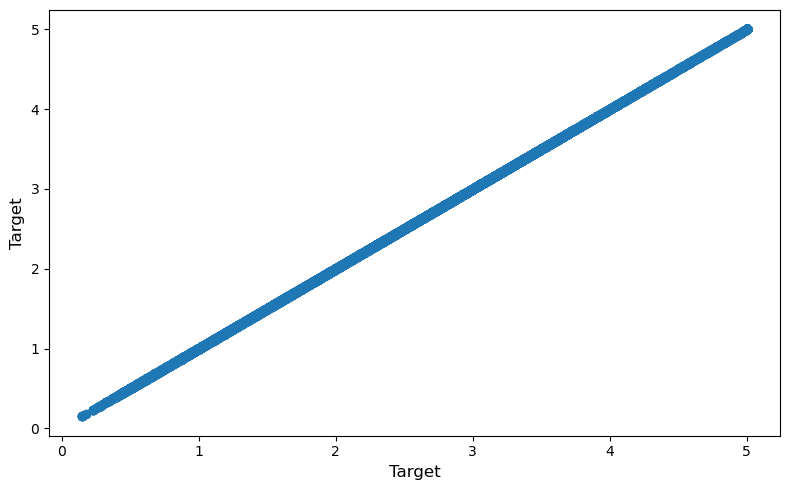

In [22]:
for i, col in enumerate(california_df.columns):
    plt.figure(figsize=(8,5))
    plt.scatter(california_df[col], california_df['Target'])
    plt.ylabel('Target', size=12)
    plt.xlabel(col, size=12)
    plt.tight_layout()

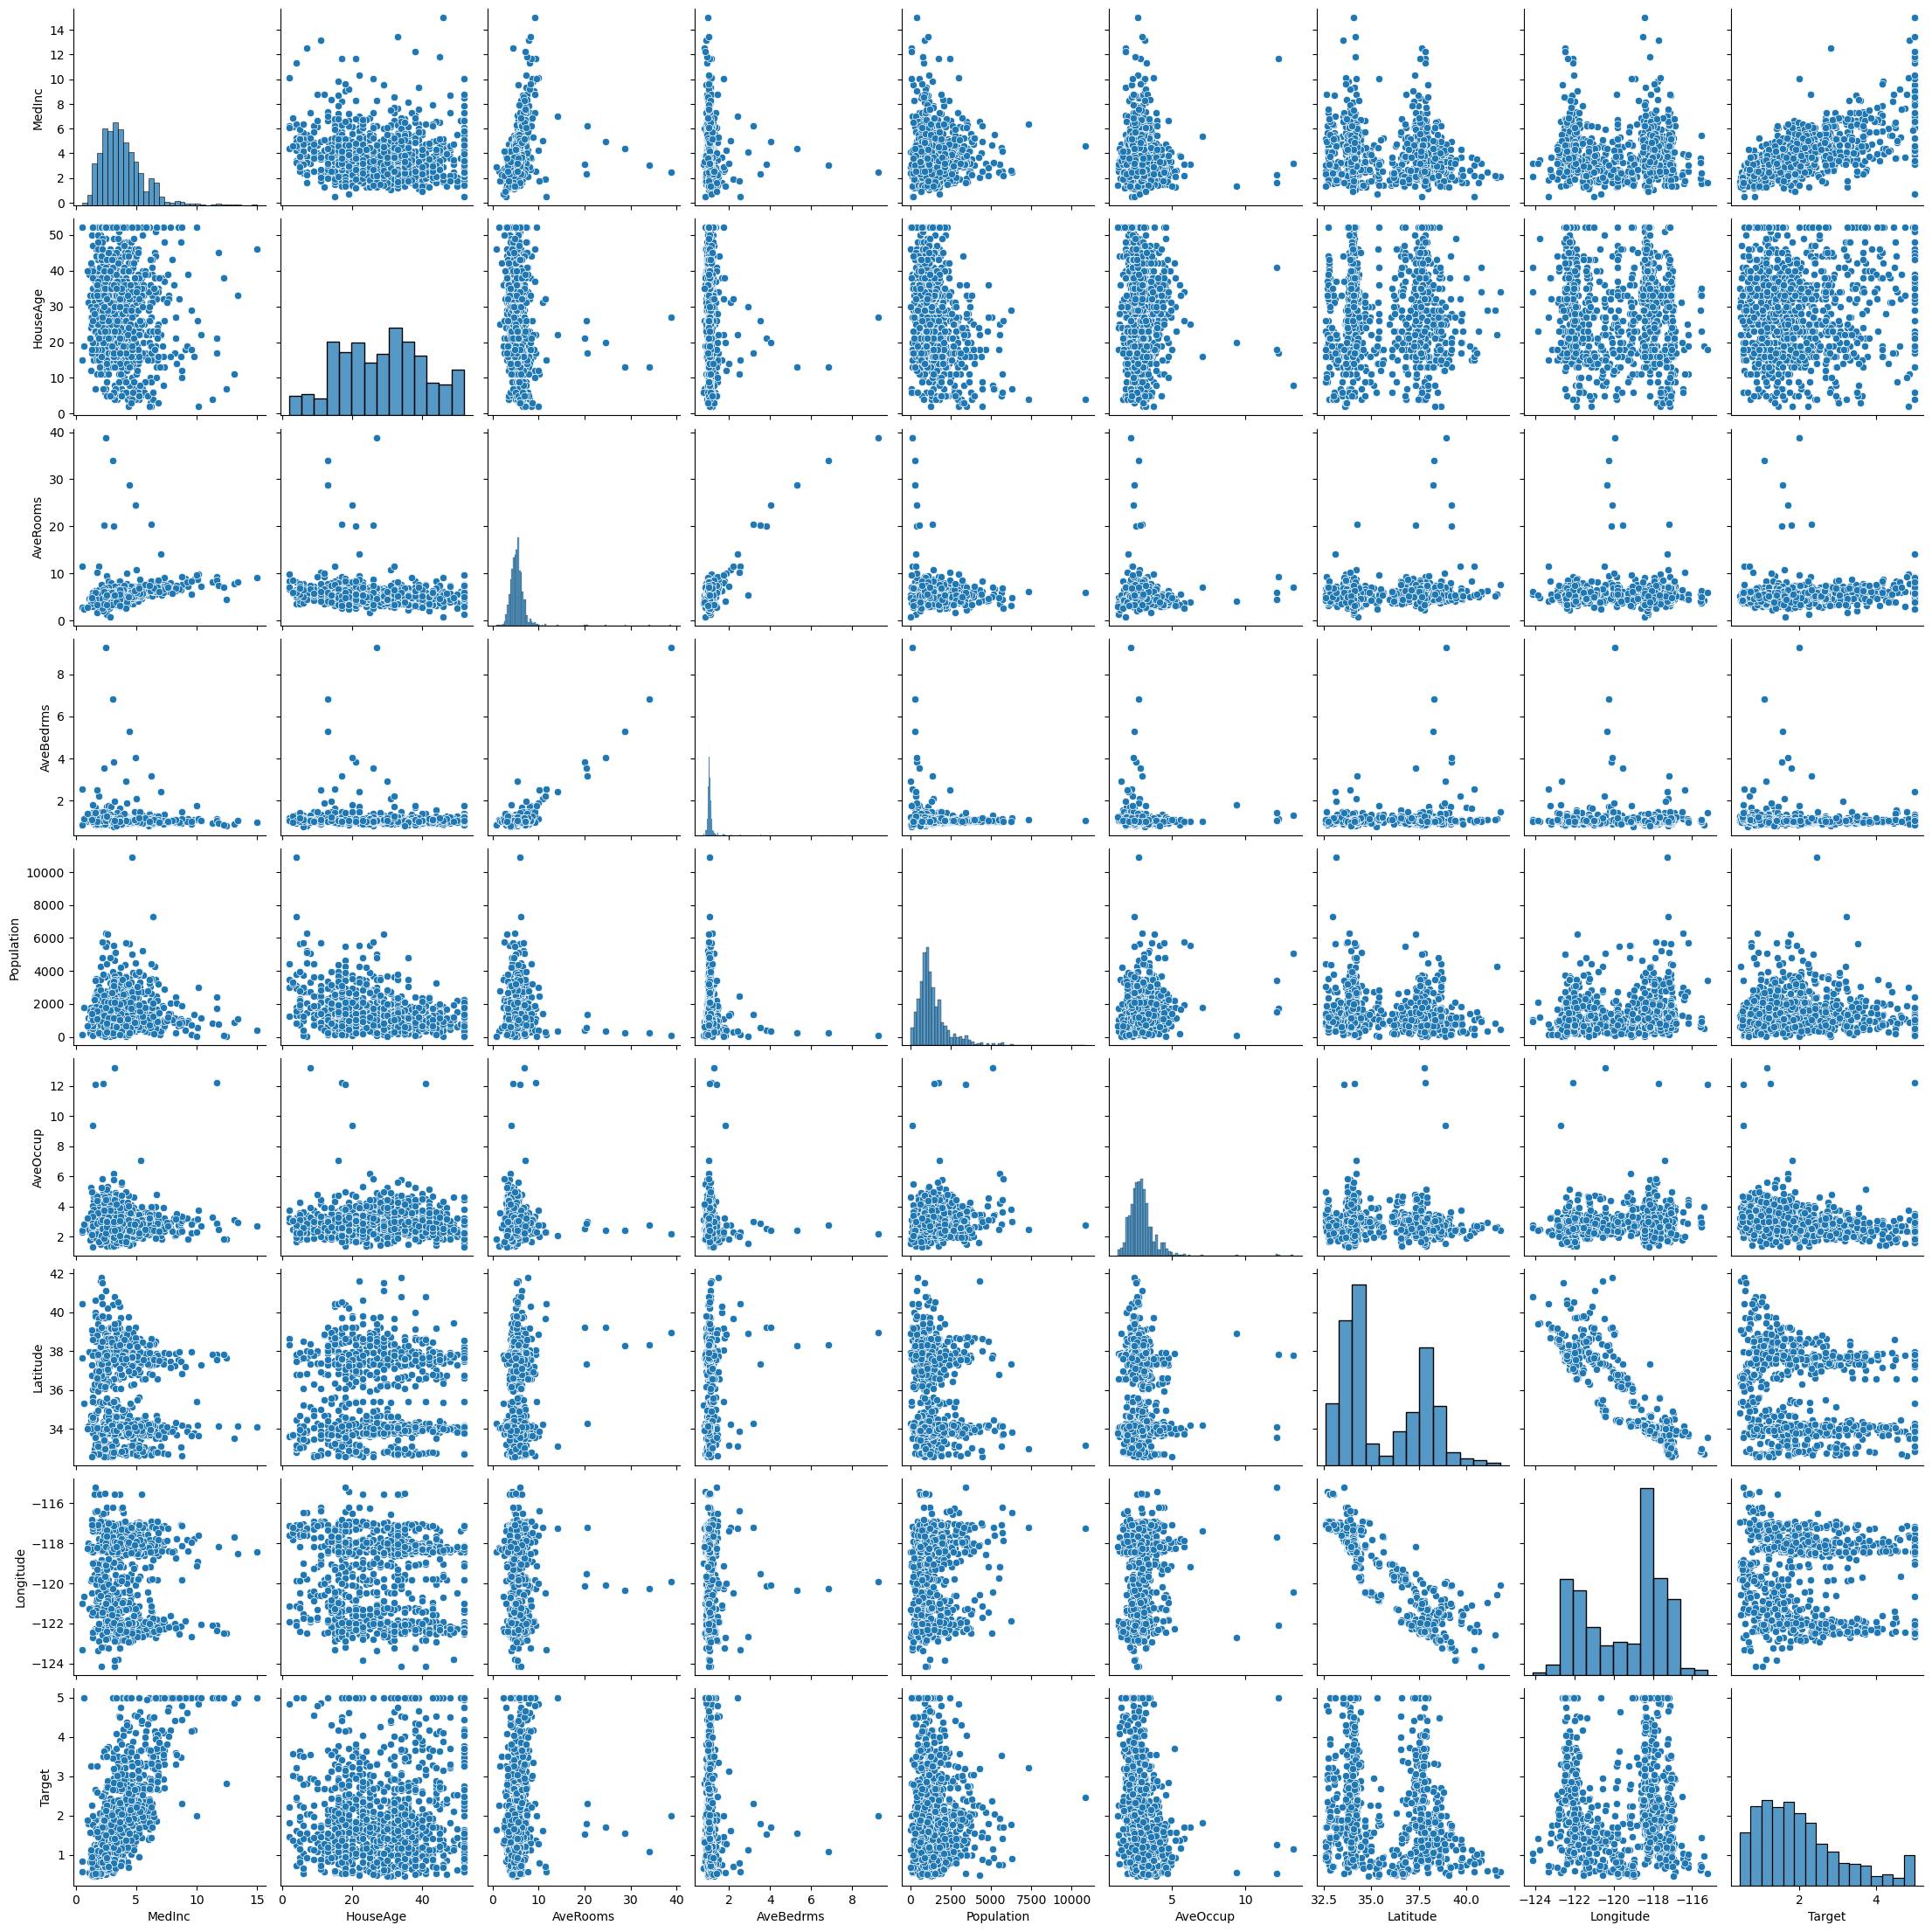

In [24]:
import seaborn as sns

sns.pairplot(california_df.sample(1000));

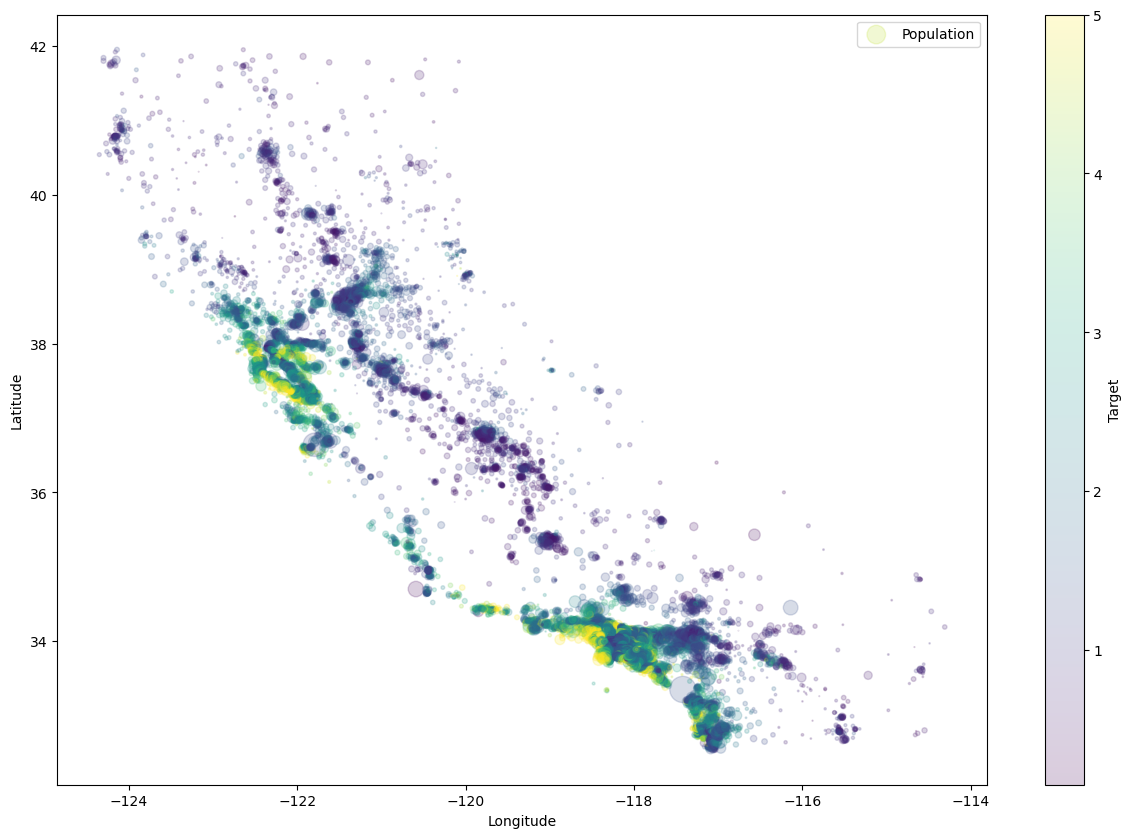

In [36]:
# 캘리포니아 위치에 대해 인구수(점의 크기), target(색상) 나타내기

california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, 
                   s=california_df['Population']/100, label='Population', figsize=(15,10),
                  c='Target', cmap=plt.get_cmap('viridis'), colorbar=True);

In [ ]:
# LinearRegression

In [117]:
# 모델 클래스 지정
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

model = LinearRegression()

# 학습/테스트 데이터 세트 분리 : train_test_split
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

# 데이터 전처리 : StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# 모델 성능 평가
model.fit(X_train_scaled, y_train)
print('학습 데이터 점수 : {}'.format(model.score(X_train_scaled, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test_scaled, y_test)))

# 모델 교차검증을 통한 성능 평가 : NMSE
scores = cross_val_score(model, california.data, california.target, cv=10, scoring='neg_mean_squared_error')
print('NMSE mean : {}'.format(scores.mean()))
print('NMSE std : {}'.format(scores.std()))

# 모델 교차검증을 통한 성능 평가 : r2
r2_scores = cross_val_score(model, california.data, california.target, cv=10, scoring='r2')
print('R2 Score mean : {}'.format(r2_scores.mean()))

학습 데이터 점수 : 0.6017461493980315
평가 데이터 점수 : 0.6191447925200362
NMSE mean : -0.5509524296956663
NMSE std : 0.19288582953865124
R2 Score mean : 0.5110068610523755


In [119]:
# 최적 선형 모델 도출
print('y = ' + str(model.intercept_) + ' ')
for i, c in enumerate(model.coef_):
    print(str(c) + ' * x' + str(i))

y = 2.066358495639325 
0.8210866285044921 * x0
0.12000329504428842 * x1
-0.27313255440560236 * x2
0.31427761129573956 * x3
-0.00623106794176882 * x4
-0.04135721891617798 * x5
-0.8889121830784863 * x6
-0.8570250431123347 * x7


In [121]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# 학습데이터 평가
y_train_predict = model.predict(X_train_scaled)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print('RMSE : {}'.format(rmse))
print('R2 Score : {}'.format(r2))

RMSE : 0.724891450713803
R2 Score : 0.6017461493980315


In [123]:
# 테스트데이터 평가
y_test_predict = model.predict(X_test_scaled)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print('RMSE : {}'.format(rmse))
print('R2 Score : {}'.format(r2))

RMSE : 0.7249531694068826
R2 Score : 0.6191447925200362


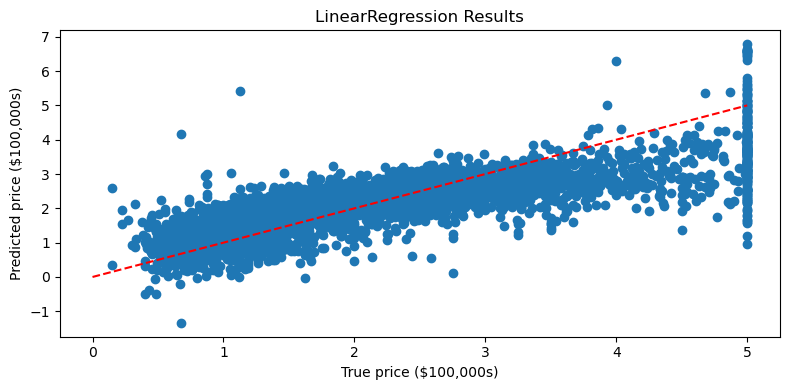

In [125]:
def plot_california_prices(expected, predicted):
    plt.figure(figsize=(8,4))
    plt.scatter(expected, predicted)
    plt.plot([0, 5], [0, 5], '--r')
    plt.xlabel('True price ($100,000s)')
    plt.ylabel('Predicted price ($100,000s)')
    plt.title(f"{model.__class__.__name__} Results")
    plt.tight_layout()

predicted = model.predict(X_test_scaled)
expected = y_test

plot_california_prices(expected, predicted)

In [127]:
print(f"{model.__class__.__name__} Results")

LinearRegression Results


In [129]:
# Ridge
# 가중치의 절대값을 최대한 작게하여 특성(feature)이 출력 값에 주는 영향을 최소화하도록 규제한 선형 모델

In [131]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [133]:
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

Ridge()

In [135]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.6063522276361581
평가 데이터 점수 : 0.6034931783765675


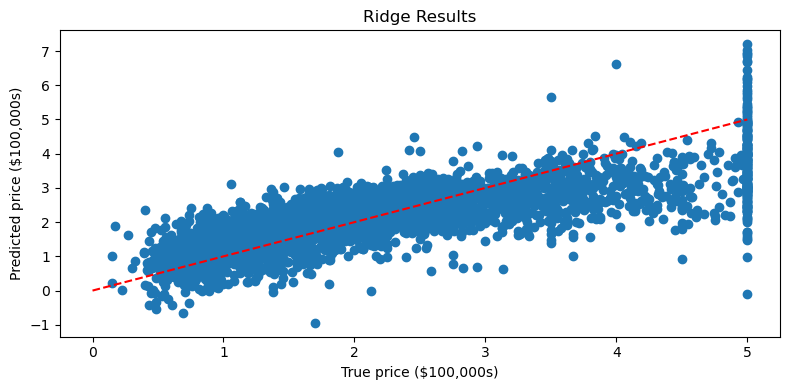

In [141]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

In [139]:
# Lasso

In [145]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [151]:
model = Lasso(alpha=0.01)
model.fit(X_train, y_train)

Lasso(alpha=0.01)

In [153]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.604167158681342
평가 데이터 점수 : 0.5940499410727343


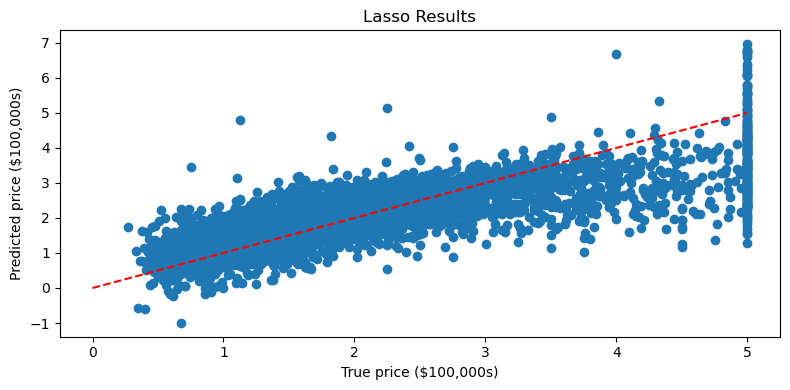

In [155]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

In [157]:
from sklearn.linear_model import ElasticNet

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [159]:
model = ElasticNet(alpha=0.01, l1_ratio=0.5)
model.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [161]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.6004436197138145
평가 데이터 점수 : 0.6185820942772644


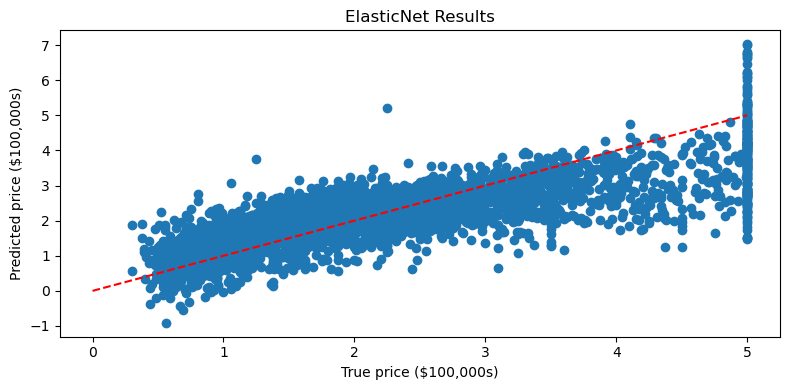

In [163]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

In [165]:
# OrthogonalMatchingPursuit

In [187]:
from sklearn.linear_model import OrthogonalMatchingPursuit

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [189]:
model = OrthogonalMatchingPursuit(n_nonzero_coefs=7)
model.fit(X_train, y_train)

OrthogonalMatchingPursuit(n_nonzero_coefs=7)

In [191]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.5972118089516771
평가 데이터 점수 : 0.591694182370366


Text(0.5, 1.0, 'OrthogonalMatchingPursuit(n_nonzero_coefs=7)')

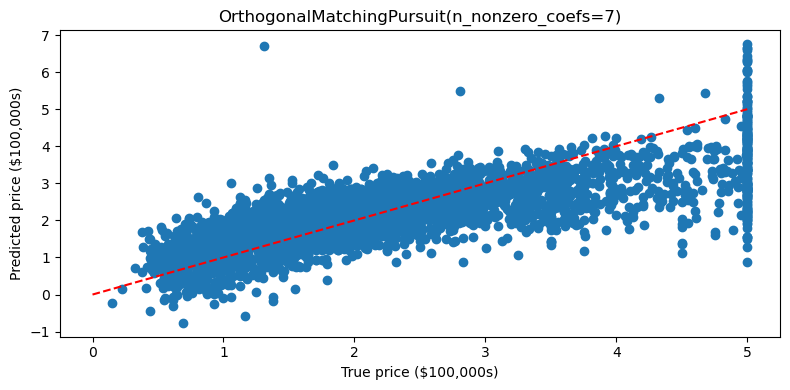

In [193]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)
plt.title('OrthogonalMatchingPursuit(n_nonzero_coefs=7)')

In [175]:
model = OrthogonalMatchingPursuit(tol=1.)
model.fit(X_train, y_train)

C:\Users\thaud\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:186: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  return func(*args, **kwargs)


OrthogonalMatchingPursuit(tol=1.0)

In [177]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.6134151805524892
평가 데이터 점수 : 0.5729629999665101


Text(0.5, 1.0, 'OrthogonalMatchingPursuit(tol=1.0)')

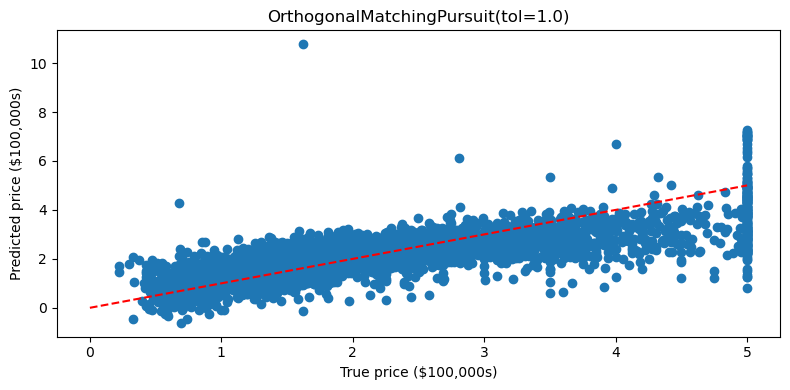

In [183]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)
plt.title('OrthogonalMatchingPursuit(tol=1.0)')

In [ ]:
# PolynomialFeatures

In [197]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline # 여러 머신러닝을 처리 단계대로 수행

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, random_state=123)

In [199]:
model = make_pipeline(PolynomialFeatures(degree=2),
                      StandardScaler(),
                      LinearRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [201]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.6805245247835161
평가 데이터 점수 : 0.6313778384683313


Text(0.5, 1.0, 'Polynomial Regression')

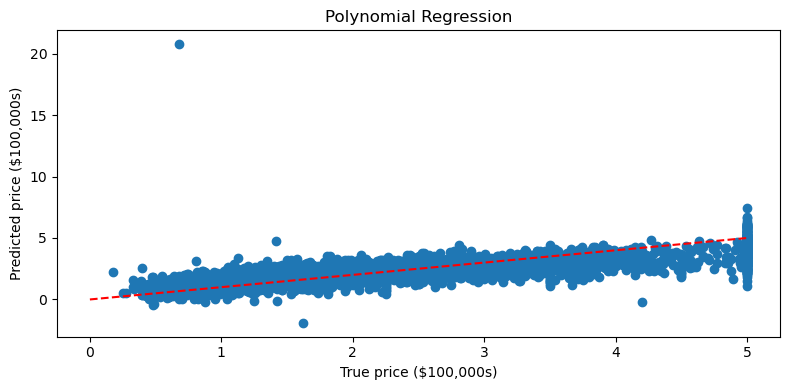

In [207]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)
plt.title('Polynomial Regression')